<a href="https://colab.research.google.com/github/jesschannn/datasci_6_regression/blob/main/datasci_6_anova_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up

In [ ]:
!pip install ucimlrepo

In [17]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Loading in Dataset and Variables

In [ ]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

In [5]:
# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

In [20]:
df1 = pd.DataFrame(X)
df1

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [7]:
df1.to_csv('diabetes.csv')

# Modified Dataframe

In [41]:
df2 = df1[['gender', 'A1Cresult', 'time_in_hospital']]
df2

,race,A1Cresult,time_in_hospital
0,Caucasian,None,1
1,Caucasian,None,3
2,AfricanAmerican,None,2
3,Caucasian,None,2
4,Caucasian,None,1
...,...,...,...
101761,AfricanAmerican,>8,3
101762,AfricanAmerican,None,5
101763,Caucasian,None,1
101764,Caucasian,None,10


In [42]:
df = df2.dropna()

In [43]:
df

,race,A1Cresult,time_in_hospital
0,Caucasian,None,1
1,Caucasian,None,3
2,AfricanAmerican,None,2
3,Caucasian,None,2
4,Caucasian,None,1
...,...,...,...
101761,AfricanAmerican,>8,3
101762,AfricanAmerican,None,5
101763,Caucasian,None,1
101764,Caucasian,None,10


In [44]:
df.to_csv('clean_diabetes.csv')

# Checking Data Types

In [22]:
data_type = df.dtypes
data_type

race                object
A1Cresult           object
time_in_hospital     int64
dtype: object

# Checking for Normality

IV 1: race

IV 2: A1Cresult

DV: time_in_hospital

**Interpretation**: Based on the p-value of the stats.shapiro test, the p-value of 0.0 indicates that the data is not normally distributed from the parametrics statistics perspective because the p-value is too low. The histogram further proves this because the data is skewed to the right. Additionally, from a more comprehensive Shapiro-Wilks test, it's observed that the p-values generated from each combination of race and A1Cresult produces p-values that are all below 0.05. Therefore, the data is not normally distributed.

In [46]:
stats.shapiro(df['time_in_hospital'])

ShapiroResult(statistic=0.8867098093032837, pvalue=0.0)

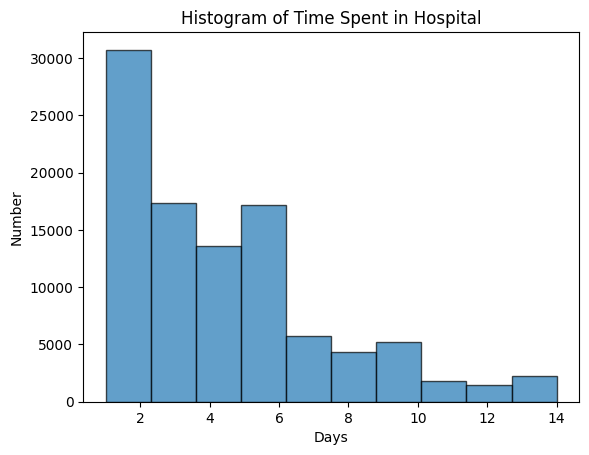

In [47]:
plt.hist(df['time_in_hospital'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Time Spent in Hospital')
plt.xlabel('Days')
plt.ylabel('Number')
plt.show()

## Shapiro-Wilks Test

In [48]:
groups = df.groupby(['race', 'A1Cresult'])

for (race_status, A1Cresult_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({race_status}, {A1Cresult_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (AfricanAmerican, >7):
P-value from Shapiro-Wilk Test: 1.8906119489850806e-16

Group (AfricanAmerican, >8):
P-value from Shapiro-Wilk Test: 6.7359146155303186e-34

Group (AfricanAmerican, None):
P-value from Shapiro-Wilk Test: 0.0

Group (AfricanAmerican, Norm):
P-value from Shapiro-Wilk Test: 2.9696700824519264e-25

Group (Asian, >7):
P-value from Shapiro-Wilk Test: 0.0023467366117984056

Group (Asian, >8):
P-value from Shapiro-Wilk Test: 2.233798113593366e-05

Group (Asian, None):
P-value from Shapiro-Wilk Test: 2.6558121925662052e-21

Group (Asian, Norm):
P-value from Shapiro-Wilk Test: 0.0007482930086553097

Group (Caucasian, >7):
P-value from Shapiro-Wilk Test: 1.7925673399754353e-38

Group (Caucasian, >8):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, Norm):
P-value from Shapiro-Wilk Test: 1.930148504761003e-41

Group (Hispanic, >7):
P-value from Shapiro-Wilk Test: 2.1721559733123286e-06

Group (Hispanic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Homoscedasticity (Equal Variances)

**Interpretation**: NaN??

## Levene Test

In [52]:
stats.levene(
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'African American'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'African American'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'African American'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'African American'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == 'Norm'],
)

LeveneResult(statistic=nan, pvalue=nan)

# ANOVA

In [53]:
model = ols('time_in_hospital ~ C(race) * C(A1Cresult)', data=df).fit()

In [54]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                             sum_sq       df           F        PR(>F)
C(race)                  641.735130      4.0   18.075566  7.501203e-15
C(A1Cresult)            3895.231358      3.0  146.287793  1.363867e-94
C(race):C(A1Cresult)     276.823623     12.0    2.599070  1.845652e-03
Residual              882895.150091  99473.0         NaN           NaN
